In [1]:
import anndata
import scanpy as sc
import pandas as pd
import os
import hisepy

In [2]:
def read_adata_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file)
    return adata

In [3]:
def read_obs_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file, backed = 'r').obs.copy()
    return adata

In [4]:
def read_parquet_uuid(parquet_uuid):
    pq_path = '/home/jupyter/cache/{u}'.format(u = parquet_uuid)
    if not os.path.isdir(pq_path):
        hise_res = hisepy.reader.cache_files([parquet_uuid])
    pq_filename = os.listdir(pq_path)[0]
    pq_file = '{p}/{f}'.format(p = pq_path, f = pq_filename)
    df = pd.read_parquet(pq_file)
    return df

In [5]:
anno_cols = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3']

In [6]:
cell_class = 'b-cell'

## Read new subclustering results from HISE

In [19]:
new_h5ad_uuid = '99f83994-26ee-49af-a882-c1f2558daed2'
new_adata = read_adata_uuid(new_h5ad_uuid)

In [20]:
new_pq_uuid = '0c87552f-d155-4b95-9a87-c3682b206f6c'
new_anno = read_parquet_uuid(new_pq_uuid)

In [21]:
new_obs = new_adata.obs.copy()
new_obs = new_obs.reset_index(drop = True)
new_obs = new_obs.merge(new_anno, on = 'barcodes', how = 'left')
new_obs['AIFI_L1'] = new_obs['AIFI_L1'].astype('category')
new_obs['AIFI_L2'] = new_obs['AIFI_L2'].astype('category')
new_obs['AIFI_L3'] = new_obs['AIFI_L3'].astype('category')
new_obs = new_obs.set_index('barcodes', drop = False)

In [22]:
new_obs['AIFI_L1'].value_counts()

AIFI_L1
B cell                       160632
Erythrocyte contamination      5962
B_platelet doublet             3948
T_B doublet                    2803
B_mono doublet                 2535
NK_Mono doublet                2114
Name: count, dtype: int64

In [23]:
sum(new_obs['AIFI_L1'].isna())

0

In [24]:
new_anno.obs = new_obs

/tmp/ipykernel_15856/108851738.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_anno.obs = new_obs


In [25]:
new_anno.obs.columns

Index(['barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id',
       'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads',
       'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id',
       'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid',
       'subject.biologicalSex', 'subject.race', 'subject.ethnicity',
       'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id',
       'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1',
       'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5',
       'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score',
       'predicted_doublet', 'doublet_score', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


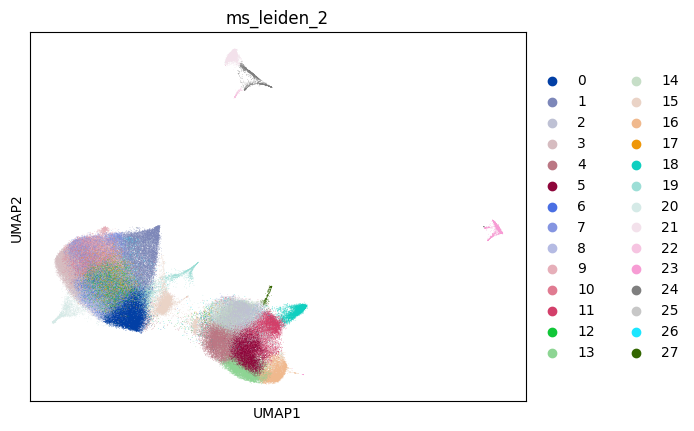

In [27]:
sc.pl.umap(
    new_adata,
    color = 'ms_leiden_2'
)

In [28]:
temp_adata = anndata.AnnData(
    X = new_adata.X,
    obs = new_obs
)

In [29]:
new_adata.obs = temp_adata.obs

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

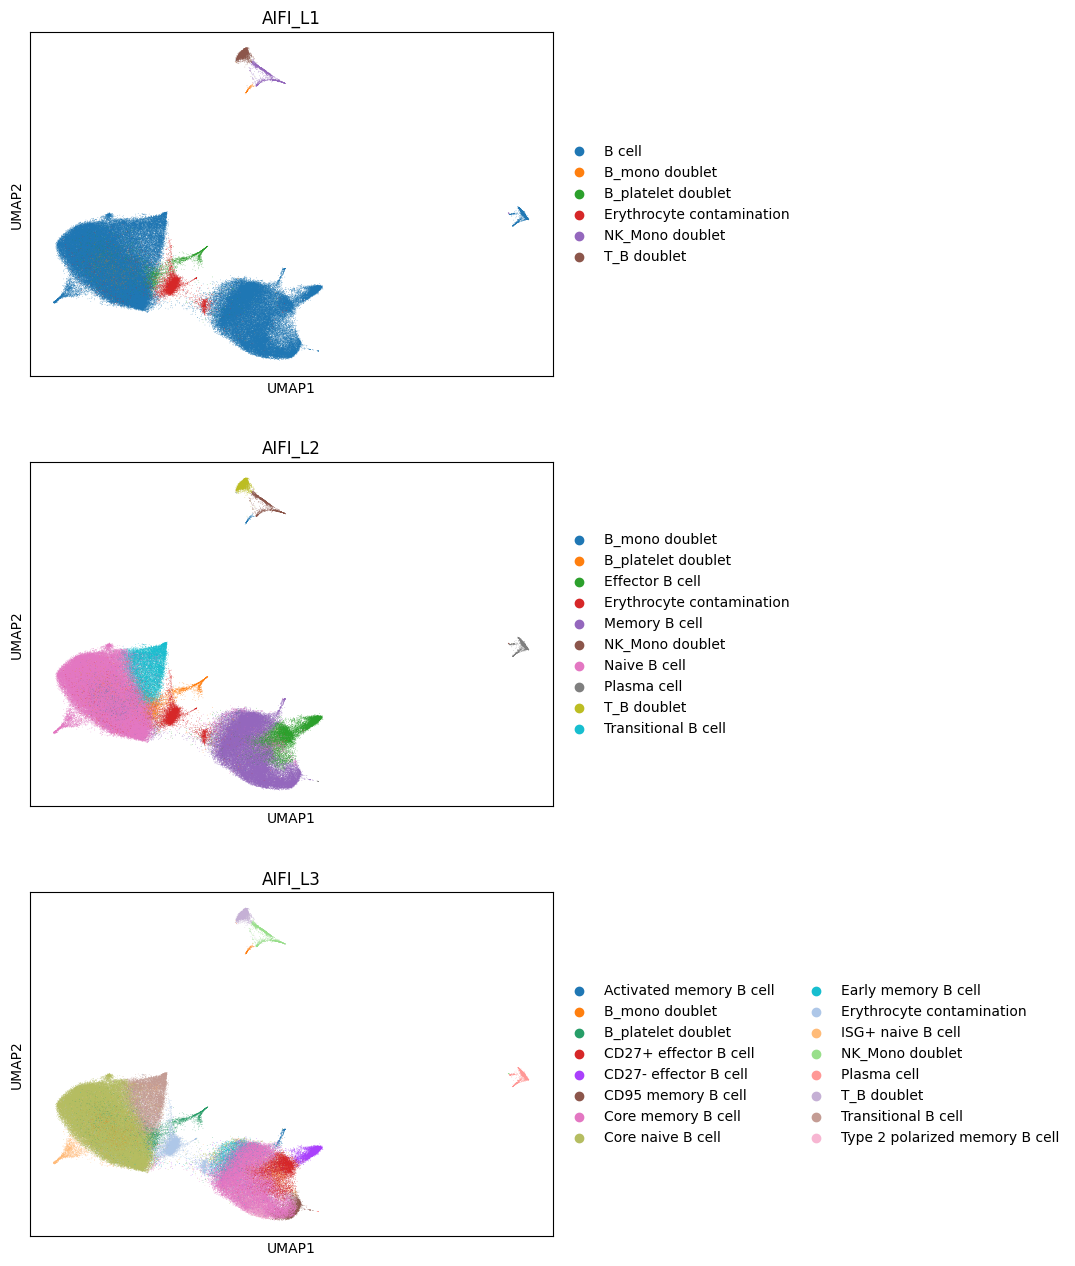

In [30]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [31]:
new_labels = new_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    new_labels = new_labels.rename({col: 'new_' + col}, axis = 1)
new_labels = new_labels.reset_index(drop = True)

## Read old subclustering results from HISE

In [46]:
old_h5ad_uuid = '793d0a72-abf5-4aca-8b58-a0e584e318d9'
old_adata = read_adata_uuid(old_h5ad_uuid)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [47]:
old_pq_uuid = 'd4d2c0f6-7d39-4461-8bc6-aa0fbb5028ce'
old_anno = read_parquet_uuid(old_pq_uuid)

In [48]:
old_anno = old_anno[['barcodes', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3']]

In [49]:
old_obs = old_adata.obs.copy()
old_obs = old_obs.reset_index(drop = True)
old_obs = old_obs.merge(old_anno, on = 'barcodes', how = 'left')
old_obs = old_obs.set_index('barcodes', drop = False)

In [51]:
old_adata.obs = old_obs

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


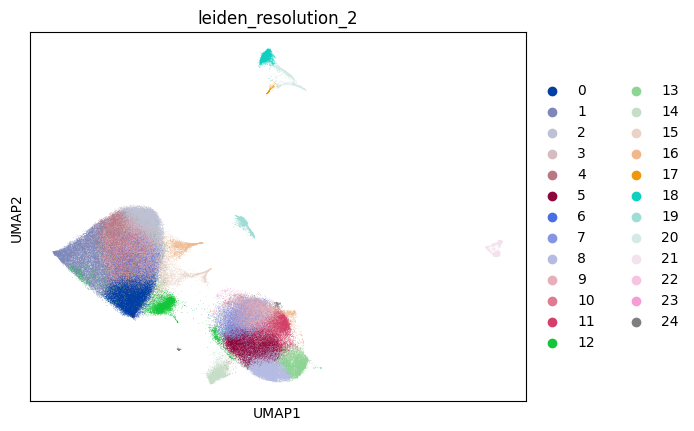

In [52]:
sc.pl.umap(
    old_adata,
    color = ['leiden_resolution_2'],
    ncols = 1
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

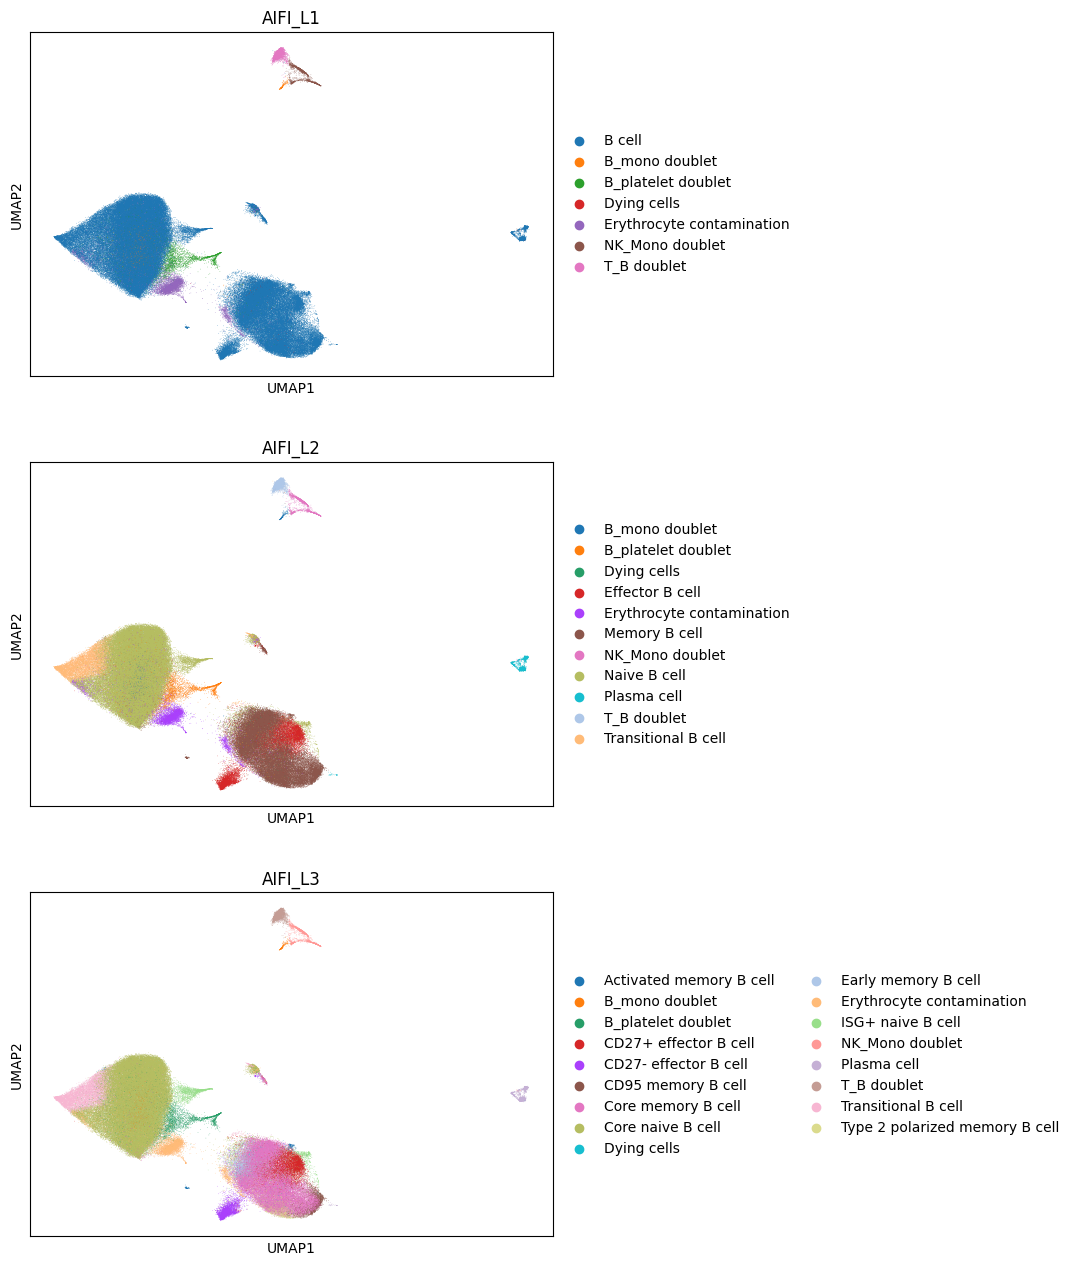

In [53]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [54]:
old_labels = old_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    old_labels = old_labels.rename({col: 'old_' + col}, axis = 1)
old_labels = old_labels.reset_index(drop = True)

# Comparisons

In [55]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

## L1 Comparison

In [56]:
level = 'L1'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [57]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [58]:
n_total = comp.shape[0]
n_total

178416

How many had identical assignments?

In [59]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

174809

What fraction is that?

In [60]:
frac_ident = n_ident / n_total
frac_ident

0.9797832033001524

What are the counts for each category in old and new annotations?

In [61]:
comp[old_col].value_counts()

old_AIFI_L1
B cell                       160849
Erythrocyte contamination      6008
B_platelet doublet             4055
T_B doublet                    2968
NK_Mono doublet                2264
B_mono doublet                 1908
Missing                         218
Dying cells                     146
Name: count, dtype: int64

In [62]:
comp[new_col].value_counts()

new_AIFI_L1
B cell                       160632
Erythrocyte contamination      5962
B_platelet doublet             3948
T_B doublet                    2803
B_mono doublet                 2535
NK_Mono doublet                2114
Missing                         422
Dying cells                       0
Name: count, dtype: int64

What percentage of old labels changed?

In [63]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

B cell                        -0.134909
B_mono doublet                32.861635
B_platelet doublet            -2.638718
Dying cells                 -100.000000
Erythrocyte contamination     -0.765646
NK_Mono doublet               -6.625442
T_B doublet                   -5.559299
Missing                       93.577982
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [64]:
diff = comp[comp[old_col] != comp[new_col]]

In [65]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L1                new_AIFI_L1              
B cell                     B_mono doublet               823
Erythrocyte contamination  B cell                       387
B cell                     Erythrocyte contamination    344
B_platelet doublet         B cell                       327
B_mono doublet             B cell                       288
B cell                     B_platelet doublet           269
T_B doublet                Missing                      208
NK_Mono doublet            Missing                      171
Dying cells                B cell                       136
NK_Mono doublet            B cell                        97
Missing                    T_B doublet                   86
                           NK_Mono doublet               78
B cell                     NK_Mono doublet               43
Erythrocyte contamination  B_mono doublet                39
T_B doublet                B cell                        37
B_platelet doublet         B_mono doublet      

Generate a plot on old coordinates showing where things differ

In [66]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [67]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

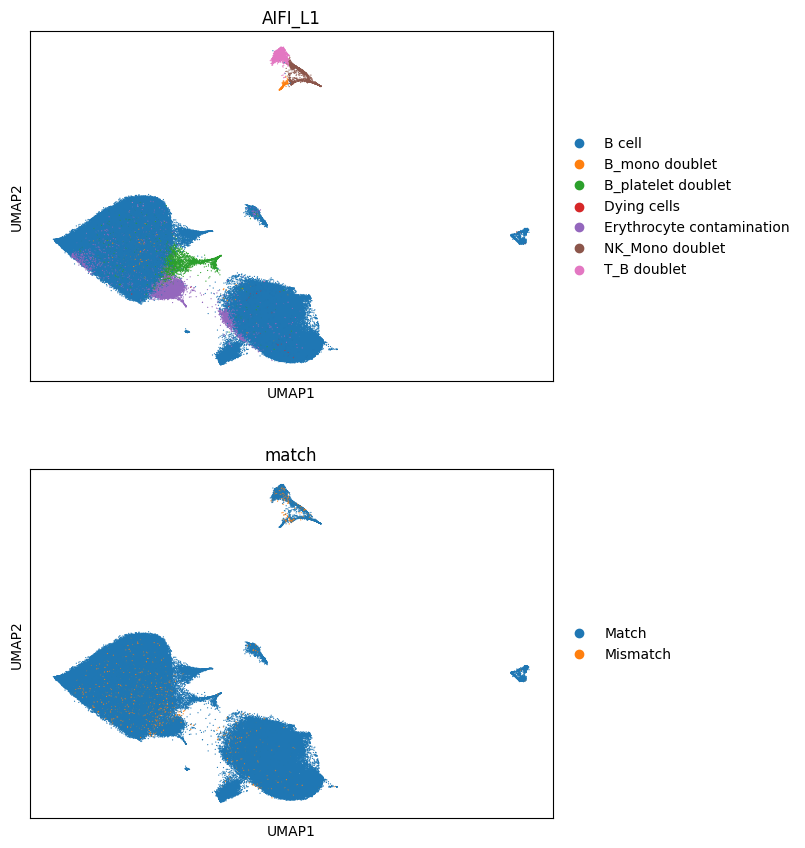

In [68]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [69]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [70]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

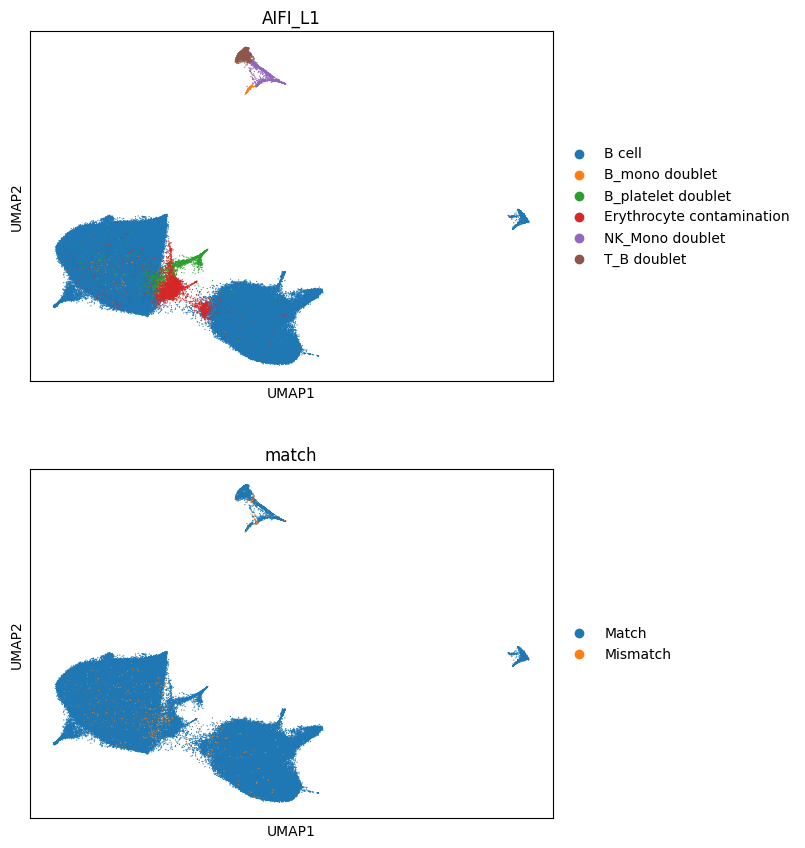

In [71]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

## L2 Comparison

In [72]:
level = 'L2'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [73]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [74]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [75]:
n_total = comp.shape[0]
n_total

178416

How many had identical assignments?

In [76]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

163438

What fraction is that?

In [77]:
frac_ident = n_ident / n_total
frac_ident

0.9160501300331809

What are the counts for each category in old and new annotations?

In [78]:
comp[old_col].value_counts()

old_AIFI_L2
Naive B cell                 90124
Memory B cell                47601
Effector B cell              11368
Transitional B cell           9587
Erythrocyte contamination     6008
B_platelet doublet            4055
T_B doublet                   2968
NK_Mono doublet               2264
Plasma cell                   2169
B_mono doublet                1908
Missing                        218
Dying cells                    146
Name: count, dtype: int64

In [79]:
comp[new_col].value_counts()

new_AIFI_L2
Naive B cell                 86711
Memory B cell                47886
Transitional B cell          12555
Effector B cell              11329
Erythrocyte contamination     5962
B_platelet doublet            3948
T_B doublet                   2803
B_mono doublet                2535
Plasma cell                   2151
NK_Mono doublet               2114
Missing                        422
Dying cells                      0
Name: count, dtype: int64

What percentage of old labels changed?

In [80]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

B_mono doublet                32.861635
B_platelet doublet            -2.638718
Dying cells                 -100.000000
Effector B cell               -0.343068
Erythrocyte contamination     -0.765646
Memory B cell                  0.598727
NK_Mono doublet               -6.625442
Naive B cell                  -3.787005
Plasma cell                   -0.829876
T_B doublet                   -5.559299
Transitional B cell           30.958590
Missing                       93.577982
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [81]:
diff = comp[comp[old_col] != comp[new_col]]

In [82]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L2                new_AIFI_L2              
Naive B cell               Transitional B cell          5318
Transitional B cell        Naive B cell                 2378
Memory B cell              Effector B cell              1146
Effector B cell            Memory B cell                1106
Naive B cell               B_mono doublet                786
                           Memory B cell                 665
Memory B cell              Naive B cell                  510
Naive B cell               Erythrocyte contamination     303
Erythrocyte contamination  Naive B cell                  303
B_platelet doublet         Naive B cell                  288
B_mono doublet             Naive B cell                  270
Naive B cell               B_platelet doublet            210
T_B doublet                Missing                       208
NK_Mono doublet            Missing                       171
Effector B cell            Naive B cell                  138
Dying cells                Memor

In [83]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [84]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

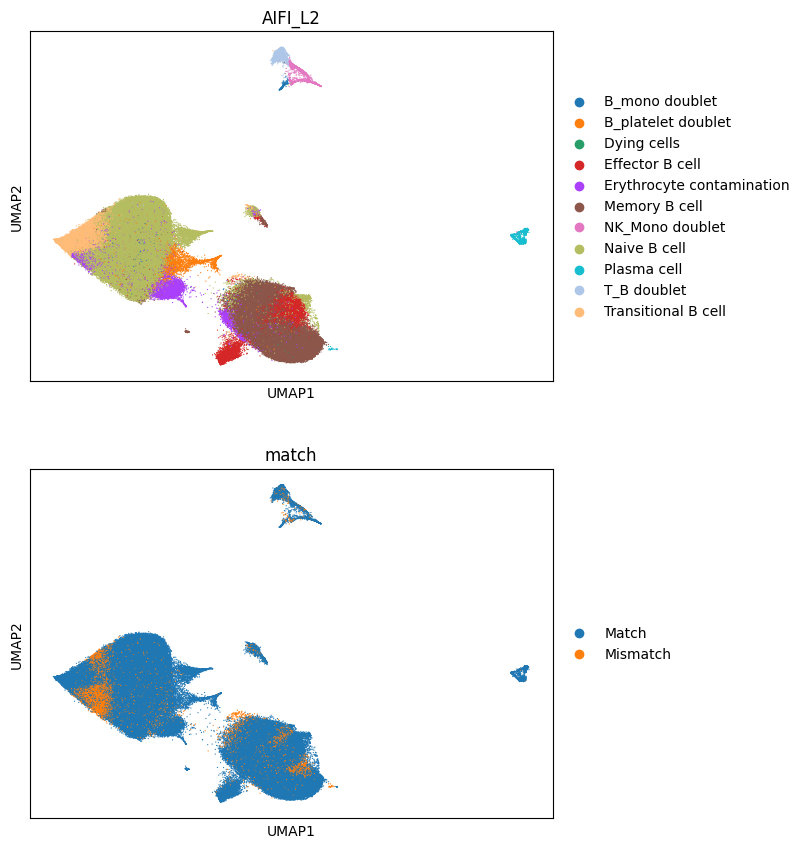

In [85]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [86]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [87]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

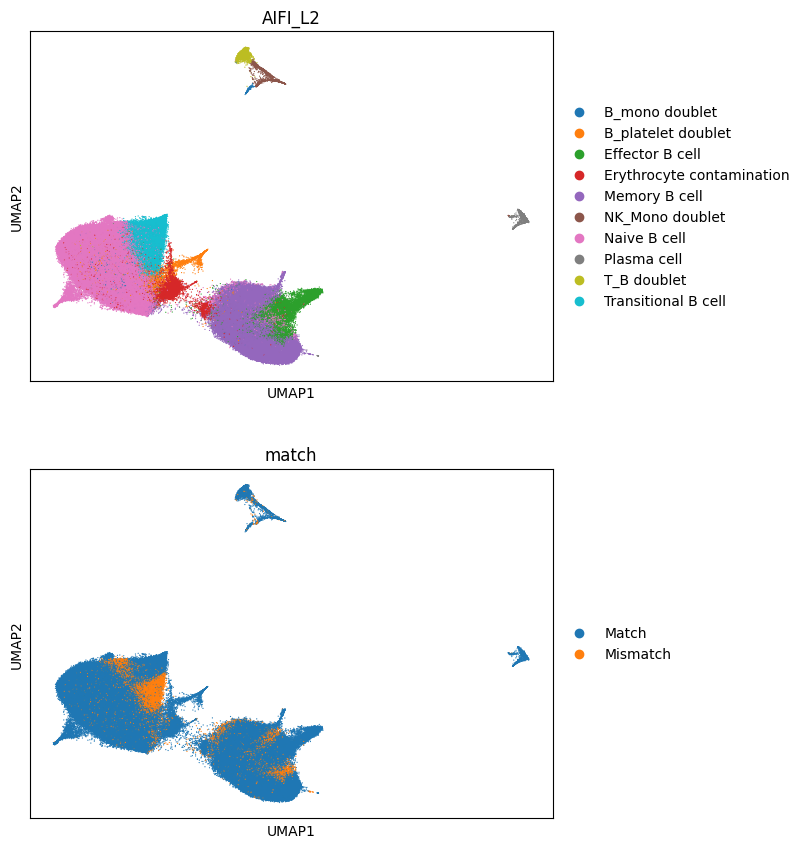

In [88]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

## L3 Comparison

In [105]:
level = 'L3'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [106]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [107]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [108]:
n_total = comp.shape[0]
n_total

178416

How many had identical assignments?

In [109]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

157963

What fraction is that?

In [110]:
frac_ident = n_ident / n_total
frac_ident

0.8853634203210474

What are the counts for each category in old and new annotations?

In [111]:
comp[old_col].value_counts()

old_AIFI_L3
Core naive B cell                 86008
Core memory B cell                38284
Transitional B cell                9587
CD27+ effector B cell              7013
Erythrocyte contamination          6008
CD27- effector B cell              4355
ISG+ naive B cell                  4116
B_platelet doublet                 4055
Early memory B cell                3706
T_B doublet                        2968
Type 2 polarized memory B cell     2734
CD95 memory B cell                 2461
NK_Mono doublet                    2264
Plasma cell                        2169
B_mono doublet                     1908
Activated memory B cell             416
Missing                             218
Dying cells                         146
Name: count, dtype: int64

In [112]:
comp[new_col].value_counts()

new_AIFI_L3
Core naive B cell                 82802
Core memory B cell                39718
Transitional B cell               12555
CD27+ effector B cell              7014
Erythrocyte contamination          5962
CD27- effector B cell              4315
B_platelet doublet                 3948
ISG+ naive B cell                  3909
Early memory B cell                3202
T_B doublet                        2803
Type 2 polarized memory B cell     2641
B_mono doublet                     2535
Plasma cell                        2151
NK_Mono doublet                    2114
CD95 memory B cell                 1892
Activated memory B cell             433
Missing                             422
Dying cells                           0
Name: count, dtype: int64

What percentage of old labels changed?

In [113]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

Activated memory B cell             4.086538
B_mono doublet                     32.861635
B_platelet doublet                 -2.638718
CD27+ effector B cell               0.014259
CD27- effector B cell              -0.918485
CD95 memory B cell                -23.120683
Core memory B cell                  3.745690
Core naive B cell                  -3.727560
Dying cells                      -100.000000
Early memory B cell               -13.599568
Erythrocyte contamination          -0.765646
ISG+ naive B cell                  -5.029155
NK_Mono doublet                    -6.625442
Plasma cell                        -0.829876
T_B doublet                        -5.559299
Transitional B cell                30.958590
Type 2 polarized memory B cell     -3.401609
Missing                            93.577982
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [114]:
diff = comp[comp[old_col] != comp[new_col]]

In [115]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L3                     new_AIFI_L3                   
Core naive B cell               Transitional B cell               5285
Transitional B cell             Core naive B cell                 2361
Early memory B cell             Core memory B cell                2047
Core memory B cell              Early memory B cell               1205
CD27+ effector B cell           Core memory B cell                 963
Core memory B cell              CD27+ effector B cell              956
Core naive B cell               B_mono doublet                     778
Type 2 polarized memory B cell  Core memory B cell                 474
Core naive B cell               Early memory B cell                413
CD95 memory B cell              Core memory B cell                 386
Core memory B cell              Type 2 polarized memory B cell     354
Erythrocyte contamination       Core naive B cell                  300
Core naive B cell               Erythrocyte contamination          297
ISG+ naive B c

In [116]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [117]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

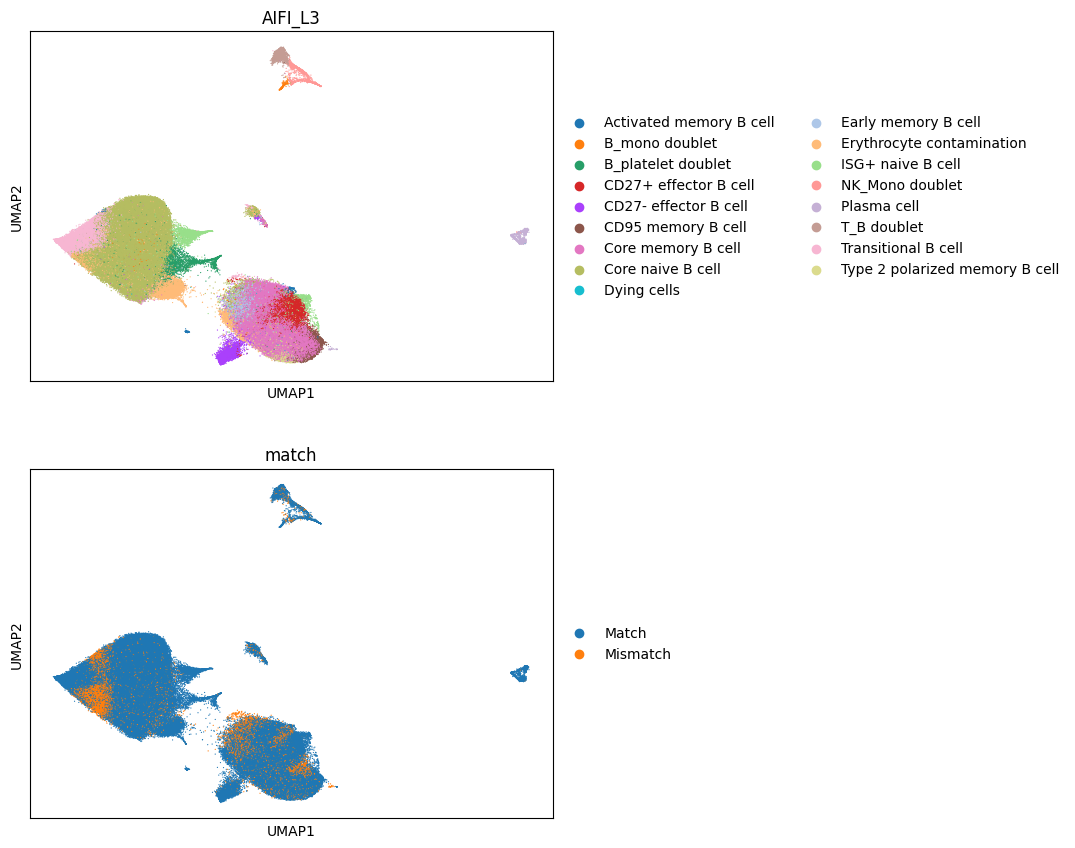

In [118]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [119]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [120]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

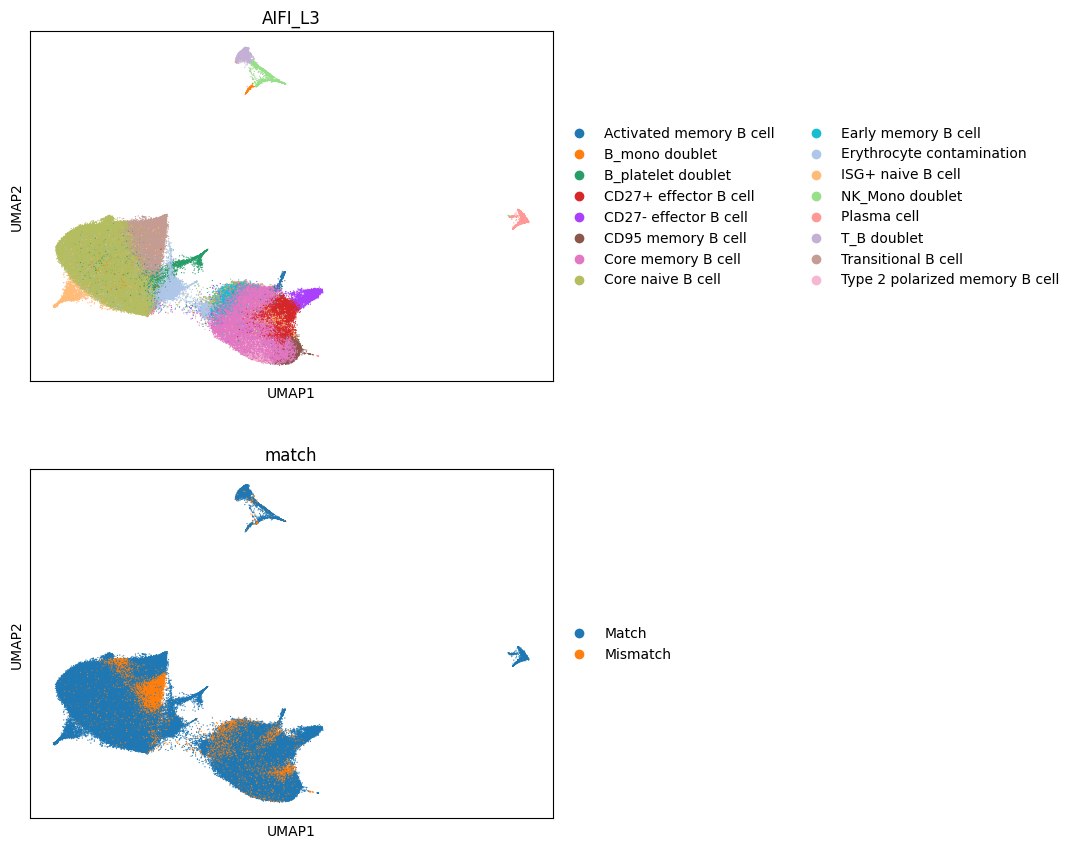

In [121]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)